import sklearn ,Import all of the scikit learn stuff from __future__ import print_function

In [1]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import warnings

Suppress warnings from pandas library

In [2]:
warnings.filterwarnings("ignore", category=DeprecationWarning, module="pandas", lineno=570)

In [3]:
import numpy
import numpy as np

In [4]:
example = ["Machine learning is very fun", "Python is very, very nice", "Statistics is nice, too", "Data science is fun",
"Python is great for machine learning", "I like Cricket", "Cricket is great to watch"]
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(example)

In [5]:
dtm.toarray()

array([[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [7]:
vectorizer.get_feature_names()

['cricket',
 'data',
 'fun',
 'great',
 'learning',
 'like',
 'machine',
 'nice',
 'python',
 'science',
 'statistics',
 'watch']

In [23]:
print(pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names()).head(10))

                                      cricket  data  fun  great  learning  \
Machine learning is very fun                0     0    1      0         1   
Python is very, very nice                   0     0    0      0         0   
Statistics is nice, too                     0     0    0      0         0   
Data science is fun                         0     1    1      0         0   
Python is great for machine learning        0     0    0      1         1   
I like Cricket                              1     0    0      0         0   
Cricket is great to watch                   1     0    0      1         0   

                                      like  machine  nice  python  science  \
Machine learning is very fun             0        1     0       0        0   
Python is very, very nice                0        0     1       1        0   
Statistics is nice, too                  0        0     1       0        0   
Data science is fun                      0        0     0       0      

In [27]:
print(pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names()).head(2))

                              cricket  data  fun  great  learning  like  \
Machine learning is very fun        0     0    1      0         1     0   
Python is very, very nice           0     0    0      0         0     0   

                              machine  nice  python  science  statistics  \
Machine learning is very fun        1     0       0        0           0   
Python is very, very nice           0     1       1        0           0   

                              watch  
Machine learning is very fun      0  
Python is very, very nice         0  


NOW Without Stopwords and without FIt Transform

In [31]:
example = ["Machine learning is very fun", "Python is very, very nice", "Statistics is nice, too", "Data science is fun",
"Python is great for machine learning", "I like Cricket", "Cricket is great to watch"]
vectorizer = CountVectorizer()
trail = vectorizer.fit_transform(example)

In [32]:
print(pd.DataFrame(trail.toarray(),index=example,columns=vectorizer.get_feature_names()).head(10))

                                      cricket  data  for  fun  great  is  \
Machine learning is very fun                0     0    0    1      0   1   
Python is very, very nice                   0     0    0    0      0   1   
Statistics is nice, too                     0     0    0    0      0   1   
Data science is fun                         0     1    0    1      0   1   
Python is great for machine learning        0     0    1    0      1   1   
I like Cricket                              1     0    0    0      0   0   
Cricket is great to watch                   1     0    0    0      1   1   

                                      learning  like  machine  nice  python  \
Machine learning is very fun                 1     0        1     0       0   
Python is very, very nice                    0     0        0     1       1   
Statistics is nice, too                      0     0        0     1       0   
Data science is fun                          0     0        0     0       0

WIthout FIt transform we got error

NOW back to including stop words

In [13]:
example = ["Machine learning is very fun", "Python is very, very nice", "Statistics is nice, too", "Data science is fun",
"Python is great for machine learning", "I like Cricket", "Cricket is great to watch"]
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(example)
Frame=pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names()).head(10)

In [14]:
Frame

,cricket,data,fun,great,learning,like,machine,nice,python,science,statistics,watch
Machine learning is very fun,0,0,1,0,1,0,1,0,0,0,0,0
"Python is very, very nice",0,0,0,0,0,0,0,1,1,0,0,0
"Statistics is nice, too",0,0,0,0,0,0,0,1,0,0,1,0
Data science is fun,0,1,1,0,0,0,0,0,0,1,0,0
Python is great for machine learning,0,0,0,1,1,0,1,0,1,0,0,0
I like Cricket,1,0,0,0,0,1,0,0,0,0,0,0
Cricket is great to watch,1,0,0,1,0,0,0,0,0,0,0,1


In [15]:
Frame2=Frame.transpose()

In [16]:
Frame2

,Machine learning is very fun,"Python is very, very nice","Statistics is nice, too",Data science is fun,Python is great for machine learning,I like Cricket,Cricket is great to watch
cricket,0,0,0,0,0,1,1
data,0,0,0,1,0,0,0
fun,1,0,0,1,0,0,0
great,0,0,0,0,1,0,1
learning,1,0,0,0,1,0,0
like,0,0,0,0,0,1,0
machine,1,0,0,0,1,0,0
nice,0,1,1,0,0,0,0
python,0,1,0,0,1,0,0
science,0,0,0,1,0,0,0


Get Words Corresponding to documents

In [17]:
vectorizer.get_feature_names()

['cricket',
 'data',
 'fun',
 'great',
 'learning',
 'like',
 'machine',
 'nice',
 'python',
 'science',
 'statistics',
 'watch']

Fit LSA.Use algorithm='randomizer' for larger dataset

In [18]:
lsa=TruncatedSVD(2,algorithm='arpack')
dtm_lsa=lsa.fit_transform(dtm)

In [19]:
dtm_lsa=Normalizer(copy=False).fit_transform(dtm_lsa)

12 components

In [20]:
lsa.components_

array([[ 0.13362291,  0.07188057,  0.29267984,  0.41045641,  0.52397928,
         0.0263465 ,  0.52397928,  0.09869938,  0.38241877,  0.07188057,
         0.01946061,  0.10727641],
       [ 0.52624627, -0.26715756, -0.46697246,  0.39359487, -0.1409598 ,
         0.1915065 , -0.1409598 ,  0.07869075,  0.10890946, -0.26715756,
         0.02863638,  0.33473977]])

Dimension reduced from 7 to 2

In [23]:
pd.DataFrame(lsa.components_,index=["component_1","component_2"],columns=vectorizer.get_feature_names())

,cricket,data,fun,great,learning,like,machine,nice,python,science,statistics,watch
component_1,0.133623,0.071881,0.292680,0.410456,0.523979,0.026346,0.523979,0.098699,0.382419,0.071881,0.019461,0.107276
component_2,0.526246,-0.267158,-0.466972,0.393595,-0.140960,0.191506,-0.140960,0.078691,0.108909,-0.267158,0.028636,0.334740


In [21]:
Frame

,cricket,data,fun,great,learning,like,machine,nice,python,science,statistics,watch
Machine learning is very fun,0,0,1,0,1,0,1,0,0,0,0,0
"Python is very, very nice",0,0,0,0,0,0,0,1,1,0,0,0
"Statistics is nice, too",0,0,0,0,0,0,0,1,0,0,1,0
Data science is fun,0,1,1,0,0,0,0,0,0,1,0,0
Python is great for machine learning,0,0,0,1,1,0,1,0,1,0,0,0
I like Cricket,1,0,0,0,0,1,0,0,0,0,0,0
Cricket is great to watch,1,0,0,1,0,0,0,0,0,0,0,1


In [62]:
pd.DataFrame(lsa.components_,index=["component_1","component_2"],columns=vectorizer.get_feature_names()).transpose()

,component_1,component_2
cricket,0.133623,0.526246
data,0.071881,-0.267158
fun,0.292680,-0.466972
great,0.410456,0.393595
learning,0.523979,-0.140960
like,0.026346,0.191506
machine,0.523979,-0.140960
nice,0.098699,0.078691
python,0.382419,0.108909
science,0.071881,-0.267158


In [24]:
Frame2

,Machine learning is very fun,"Python is very, very nice","Statistics is nice, too",Data science is fun,Python is great for machine learning,I like Cricket,Cricket is great to watch
cricket,0,0,0,0,0,1,1
data,0,0,0,1,0,0,0
fun,1,0,0,1,0,0,0
great,0,0,0,0,1,0,1
learning,1,0,0,0,1,0,0
like,0,0,0,0,0,1,0
machine,1,0,0,0,1,0,0
nice,0,1,1,0,0,0,0
python,0,1,0,0,1,0,0
science,0,0,0,1,0,0,0


In [26]:
xs=[w[0] for  w in dtm_lsa]
ys=[w[1] for  w in dtm_lsa]
print(xs,ys)

[0.87302339429535769, 0.93167806314436197, 0.74022387390087108, 0.39957179780962793, 0.99289694350273183, 0.21753791145861801, 0.46078112070153276] [-0.48767832944781575, 0.36328499371095735, 0.67236048107186319, -0.91670190268984497, 0.1189775591568973, 0.97605187212474653, 0.8875138076700777]


In [27]:
pd.DataFrame(dtm_lsa,index=example,columns=["component_1","component_2"])

,component_1,component_2
Machine learning is very fun,0.873023,-0.487678
"Python is very, very nice",0.931678,0.363285
"Statistics is nice, too",0.740224,0.672360
Data science is fun,0.399572,-0.916702
Python is great for machine learning,0.992897,0.118978
I like Cricket,0.217538,0.976052
Cricket is great to watch,0.460781,0.887514


Now Compute Document Similarity using LSA Components

In [66]:
numpy.asmatrix(dtm_lsa)

matrix([[ 0.87302339, -0.48767833],
        [ 0.93167806,  0.36328499],
        [ 0.74022387,  0.67236048],
        [ 0.3995718 , -0.9167019 ],
        [ 0.99289694,  0.11897756],
        [ 0.21753791,  0.97605187],
        [ 0.46078112,  0.88751381]])

In [68]:
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
result=pd.DataFrame(similarity,index=example, columns=example)
result

,Machine learning is very fun,"Python is very, very nice","Statistics is nice, too",Data science is fun,Python is great for machine learning,I like Cricket,Cricket is great to watch
Machine learning is very fun,1.000000,0.636211,0.318337,0.795891,0.808799,-0.286084,-0.030549
"Python is very, very nice",0.636211,1.000000,0.933909,0.039248,0.968283,0.557260,0.751720
"Statistics is nice, too",0.318337,0.933909,1.000000,-0.320582,0.814962,0.817285,0.937810
Data science is fun,0.795891,0.039248,-0.320582,1.000000,0.287667,-0.807827,-0.629470
Python is great for machine learning,0.808799,0.968283,0.814962,0.287667,1.000000,0.332121,0.563102
I like Cricket,-0.286084,0.557260,0.817285,-0.807827,0.332121,1.000000,0.966497
Cricket is great to watch,-0.030549,0.751720,0.937810,-0.629470,0.563102,0.966497,1.000000


In [70]:
result.corr()

,Machine learning is very fun,"Python is very, very nice","Statistics is nice, too",Data science is fun,Python is great for machine learning,I like Cricket,Cricket is great to watch
Machine learning is very fun,1.000000,-0.064027,-0.515298,0.923907,0.475788,-0.792243,-0.708461
"Python is very, very nice",-0.064027,1.000000,0.888246,-0.440986,0.847292,0.659679,0.749662
"Statistics is nice, too",-0.515298,0.888246,1.000000,-0.803994,0.508620,0.931194,0.969904
Data science is fun,0.923907,-0.440986,-0.803994,1.000000,0.103050,-0.965434,-0.924584
Python is great for machine learning,0.475788,0.847292,0.508620,0.103050,1.000000,0.159773,0.283672
I like Cricket,-0.792243,0.659679,0.931194,-0.965434,0.159773,1.000000,0.991926
Cricket is great to watch,-0.708461,0.749662,0.969904,-0.924584,0.283672,0.991926,1.000000


In [73]:
result.corrwith

<bound method DataFrame.corrwith of                                       Machine learning is very fun  \
Machine learning is very fun                              1.000000   
Python is very, very nice                                 0.636211   
Statistics is nice, too                                   0.318337   
Data science is fun                                       0.795891   
Python is great for machine learning                      0.808799   
I like Cricket                                           -0.286084   
Cricket is great to watch                                -0.030549   

                                      Python is very, very nice  \
Machine learning is very fun                           0.636211   
Python is very, very nice                              1.000000   
Statistics is nice, too                                0.933909   
Data science is fun                                    0.039248   
Python is great for machine learning                   0.968283   
I

In [74]:
import pylab

In [75]:
pylab.interactive(True)

In [76]:
import matplotlib.pyplot as plt

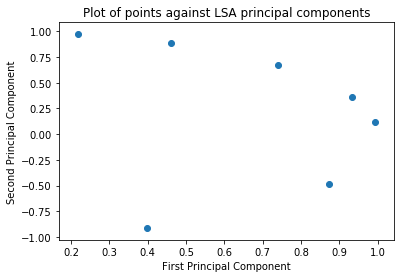

In [77]:
plt.figure(1)
plt.scatter(xs,ys)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Plot of points against LSA principal components')
plt.show(1)

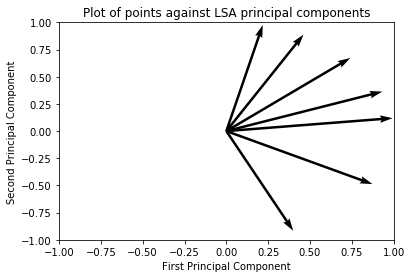

In [79]:
plt.figure(2)
ax=plt.gca()
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1,linewidth=0.01)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Plot of points against LSA principal components')
plt.show(2)